# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [18]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [19]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [20]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now... let's visualize it


In [21]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


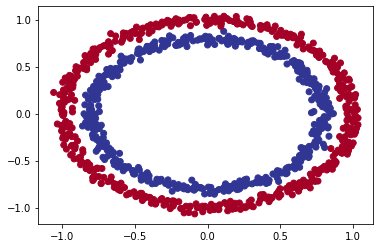

In [22]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and output shapes

In [23]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [24]:
# How manny samples we're working
len(X),len(y)

(1000, 1000)

In [25]:
# View the first example of features and labels
X[4],y[4]

(array([ 0.44220765, -0.89672343]), 0)

## Steps in modeling

The steps in modeling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [26]:
# import TensorFlow
import tensorflow as tf
tf.__version__

'2.4.1'

In [27]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5140


In [28]:
# Let's try and improve our model by trining for longer...
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(1),
   tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [30]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might wanst to add more layers or increase the number of hidden units within a layer
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model (this time 3 layers)
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100), # add 100 dense neurons
   tf.keras.layers.Dense(10), # add another layers with 10 neurons
   tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3.fit(X,y,epochs=100,verbose=0)

In [32]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [33]:
import numpy as np

In [34]:
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binarry classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binarry classification


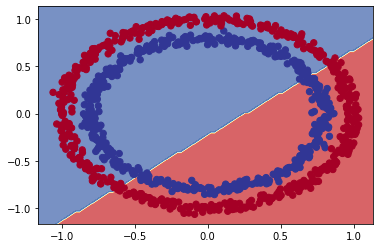

In [35]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [36]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

""" Error
# For out model to regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)
"""
"""
Epoch 1/100
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-19-7c72813a08b7> in <module>()
     14 
     15 # Fot out model to regression data
---> 16 model_3.fit(X_reg_train,y_reg_train,epochs=100)

9 frames
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)
    975           except Exception as e:  # pylint:disable=broad-except
    976             if hasattr(e, "ag_error_metadata"):
--> 977               raise e.ag_error_metadata.to_exception(e)
    978             else:
    979               raise

ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
"""


'\nEpoch 1/100\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-19-7c72813a08b7> in <module>()\n     14 \n     15 # Fot out model to regression data\n---> 16 model_3.fit(X_reg_train,y_reg_train,epochs=100)\n\n9 frames\n/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)\n    975           except Exception as e:  # pylint:disable=broad-except\n    976             if hasattr(e, "ag_error_metadata"):\n--> 977               raise e.ag_error_metadata.to_exception(e)\n    978             else:\n    979               raise\n\nValueError: in user code:\n\n    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *\n        return step_function(self, iterator)\n    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **\n    

Ohh wait... we compiled our model for a binary classigication problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [37]:
# Setup random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(10),
   tf.keras.layers.Dense(1),
])

# Compile the model, this time with regression-specific loss function
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 269.0471 - mae: 269.0471
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 154.3811 - mae: 154.3811
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 57.2730 - mae: 57.2730
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 72.9343 - mae: 72.9343
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.6513 - mae: 74.6513
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 51.1576 - mae: 51.1576
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.7825 - mae: 46.7825
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 45.3201 - mae: 45.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.2766 - mae: 43.2766
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.0545 - mae: 42.0545
Epoch 11/100
5/5 [==============================] - 0s 

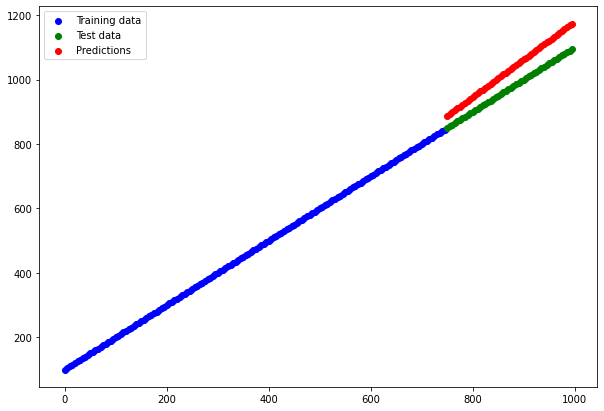

In [38]:
# Make predicitons with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7731 - accuracy: 0.4449
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9250 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6242 - accuracy: 0.4246
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8760 - accuracy: 0.3962
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5485 - accuracy: 0.4478
Epoch 11/

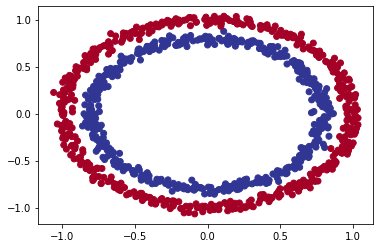

In [40]:
# Check out our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binarry classification


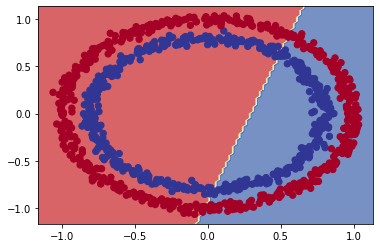

In [41]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural network with a non-linear activation function.

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu")
])

# Compile
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fitting
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7731 - accuracy: 0.4449
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9250 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6242 - accuracy: 0.4246
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8760 - accuracy: 0.3962
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5485 - accuracy: 0.4478
Epoch 11/

In [43]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code

# Set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1),
])

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [44]:
# Evaluate
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binarry classification


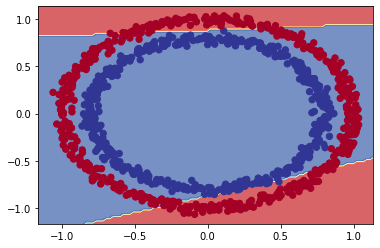

In [45]:
# How do our model prediction look
plot_decision_boundary(model_6,X,y)

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit model
history =model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [47]:
# Evaluate
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948005199432373, 0.9909999966621399]

doing binarry classification


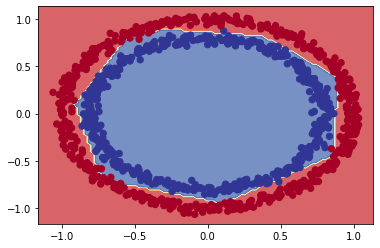

In [48]:
# Visualize
plot_decision_boundary(model_7,X,y)

In [49]:
# Create a toy tensor (similar to the data we pass in our model)

A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

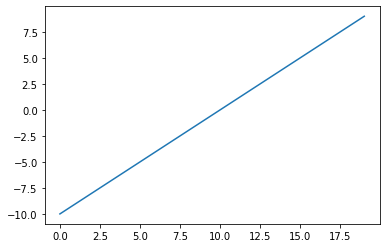

In [50]:
# Visualize our toy tensor
plt.plot(A);

In [51]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# USe the sigmoid on out toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

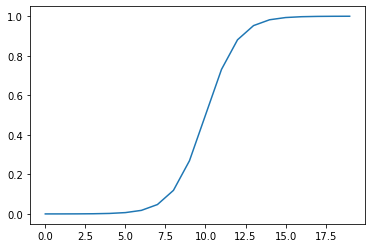

In [52]:
# Plot out toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [53]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

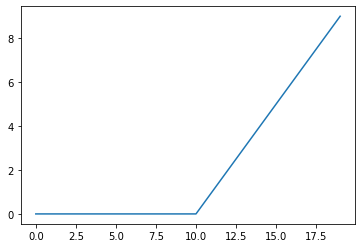

In [54]:
# Plot out toy tensor transformed by relu
plt.plot(relu(A))

In [55]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

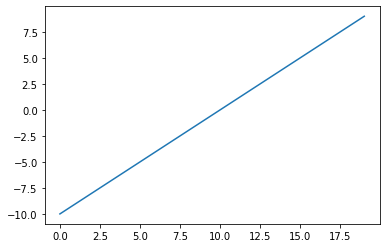

In [56]:
plt.plot(tf.keras.activations.linear(A))

In [57]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin 😂.

So let's create a training and test set.

In [58]:
# Check how many examples we havr
len(X)

1000

In [59]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [60]:
# Split into train and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [61]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Random Seed
tf.random.set_seed(42)

# Create model
model_8 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# Fit
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [62]:
# evaluate
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

doing binarry classification
doing binarry classification


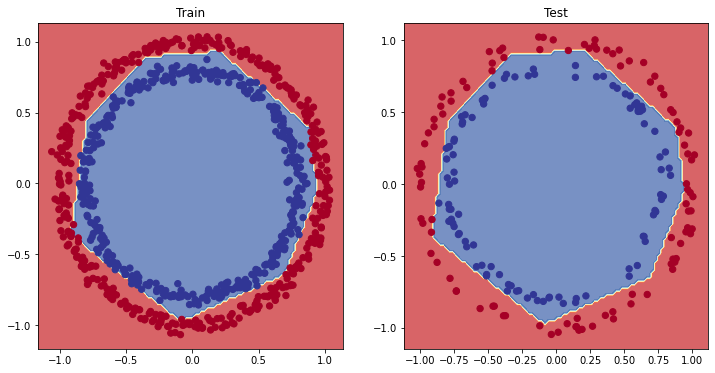

In [63]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

## Plot the loss (or training) curves

In [64]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


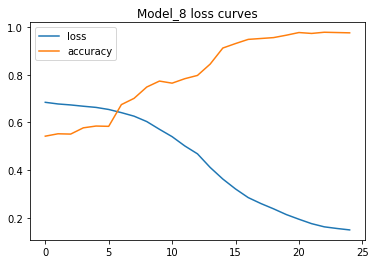

In [65]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

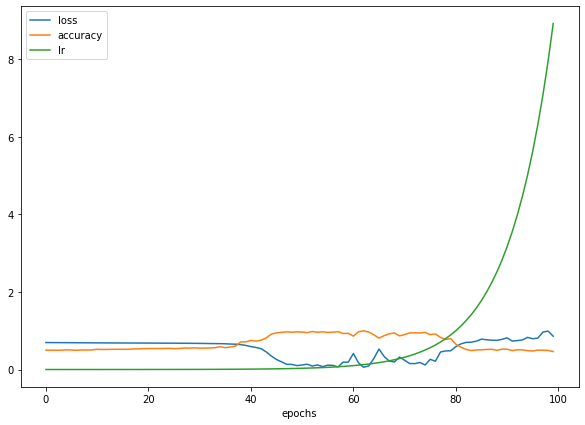

In [67]:
# Checkout history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs");

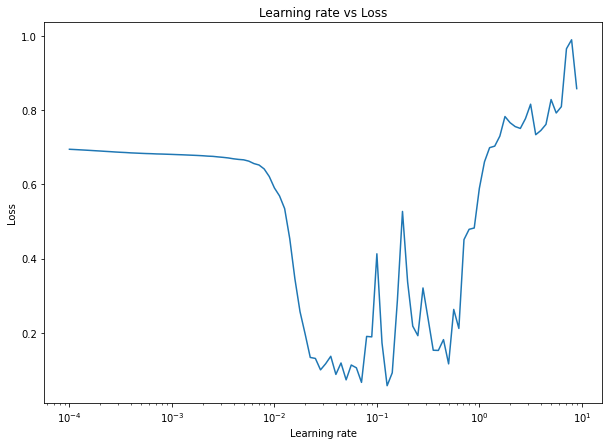

In [68]:
# Plot the learning rate vs the loss 
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

In [69]:
# Example of other typical leaning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [70]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train,y_train,epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

In [71]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018619954586, 0.9900000095367432]

In [72]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

doing binarry classification
doing binarry classification


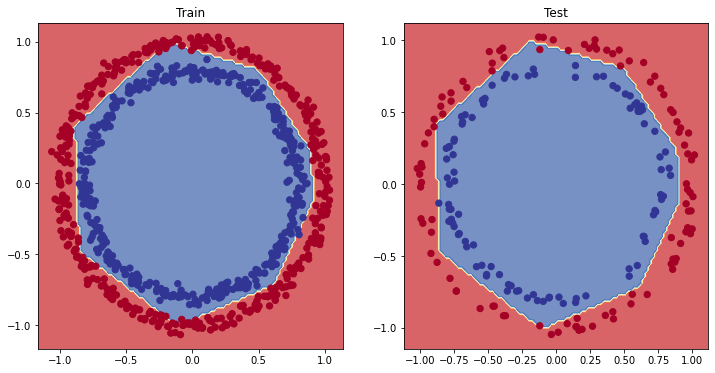

In [73]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [74]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print("Model loss on the test set: {}".format(loss))
print("Model accuracy on the test set: {0:.2f}%".format((accuracy*100)))

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.0574018619954586
Model accuracy on the test set: 99.00%


How about confusion matrix?

In [75]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create condusion matrix
# confusion_matrix(y_test,y_preds)  ...error
"""
Error:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-66-02eb26966b38> in <module>()
      6 
      7 # Create condusion matrix
----> 8 confusion_matrix(y_test,y_preds)

1 frames
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py in _check_targets(y_true, y_pred)
     88     if len(y_type) > 1:
     89         raise ValueError("Classification metrics can't handle a mix of {0} "
---> 90                          "and {1} targets".format(type_true, type_pred))
     91 
     92     # We can't have more than one value on y_type => The set is no more needed

ValueError: Classification metrics can't handle a mix of binary and continuous targets
"""

'\nError:\n---------------------------------------------------------------------------\nValueError                                Traceback (most recent call last)\n<ipython-input-66-02eb26966b38> in <module>()\n      6 \n      7 # Create condusion matrix\n----> 8 confusion_matrix(y_test,y_preds)\n\n1 frames\n/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py in _check_targets(y_true, y_pred)\n     88     if len(y_type) > 1:\n     89         raise ValueError("Classification metrics can\'t handle a mix of {0} "\n---> 90                          "and {1} targets".format(type_true, type_pred))\n     91 \n     92     # We can\'t have more than one value on y_type => The set is no more needed\n\nValueError: Classification metrics can\'t handle a mix of binary and continuous targets\n'

In [76]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [77]:
y_preds[:10]

array([[9.8526549e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706948e-01],
       [3.9622891e-01],
       [1.8126905e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6457520e-04]], dtype=float32)

Opps.. looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation form

In [78]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [79]:
# Create a confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify out confusion matrix?

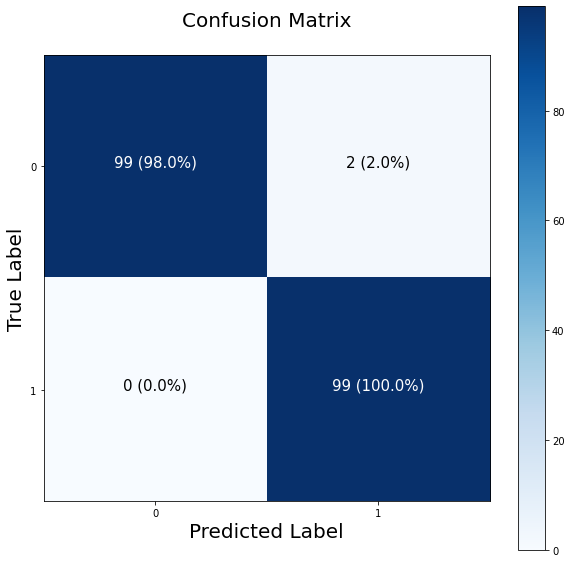

In [80]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) /2.

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",

           size=15)

In [81]:
# adding it into function so we can use it later..
def plot_confusion_matrix(tests,predictions):
  figsize = (10,10)

  # Create the confusion matrix
  cm = confusion_matrix(tests,tf.round(predictions))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) /2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)

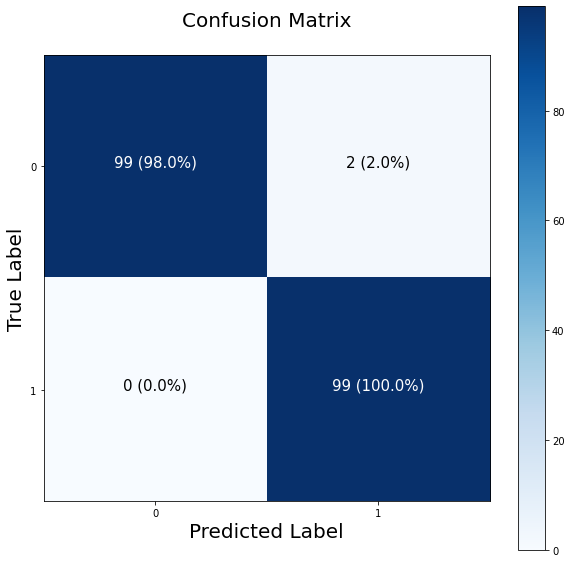

In [82]:
plot_confusion_matrix(y_test,y_preds)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.




In [83]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

 # The data has already been sorted into training and test sets for us
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [84]:
# Show the first training example
print("Training sample: {}".format(train_data[0]))
print("Training label: {}".format(train_labels[0]))

Training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [85]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

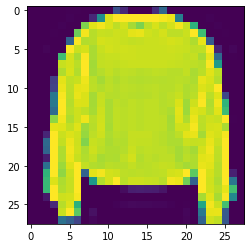

In [86]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [87]:
# Check out samples labels
train_labels[7]

2

In [88]:
# Create a small list so we can index onto out training labels so they're human readable
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

len(class_name)

10

Text(0.5, 1.0, 'Coat')

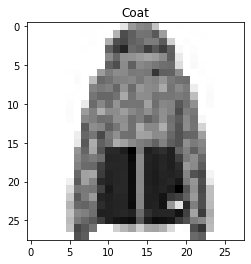

In [89]:
# Plot an example image and its label
index_of_choice = 22
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

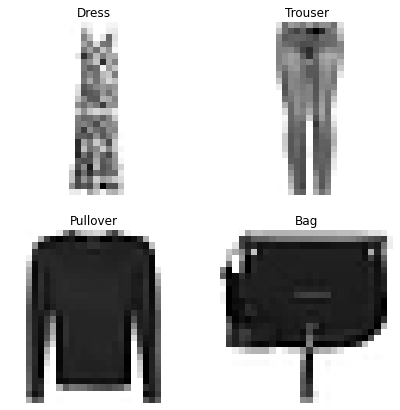

In [90]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifier, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [91]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8205 - accuracy: 0.1345 - val_loss: 1.7848 - val_accuracy: 0.2066
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7424 - accuracy: 0.2286 - val_loss: 1.6682 - val_accuracy: 0.2824
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6418 - accuracy: 0.2813 - val_loss: 1.6110 - val_accuracy: 0.2724
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6015 - accuracy: 0.2816 - val_loss: 1.6112 - val_accuracy: 0.2832
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6036 - accuracy: 0.2869 - val_loss: 1.5950 - val_accuracy: 0.2959
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5872 - accuracy: 0.2912 - val_loss: 1.5949 - val_accuracy: 0.2995
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5758 - accuracy: 0.3102 - val_loss: 1.5735 - val_accuracy:

In [92]:
# Check the model summary
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [94]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [95]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create model
model_12 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(10, activation="softmax")
])

# Compile 
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

> 🔑 **Note: ** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

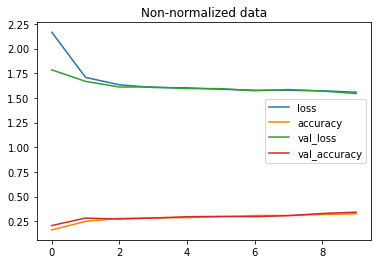

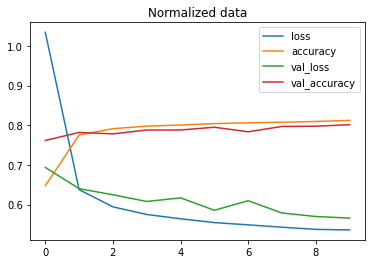

In [96]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparinf models, it's important to make sure you're comparing them on the same criteria (eg. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [97]:
# Set random seed
tf.random.set_seed(42)

# Create model 
model_13 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

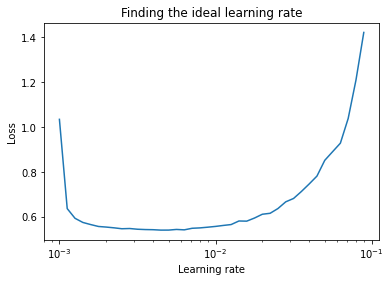

In [98]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [99]:
# Let's refit model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Lets go through the top 2..

In [100]:
# Create  confusion matrix
 
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) /2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [102]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel boot']

In [107]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[8.56303362e-11, 3.53617797e-13, 2.66337647e-05, 4.63563978e-08,
        5.09499223e-05, 9.61188599e-02, 8.17783814e-08, 9.18689668e-02,
        4.06051753e-03, 8.07873905e-01],
       [3.42786507e-06, 1.28992649e-16, 9.59891379e-01, 2.05162934e-07,
        1.53292287e-02, 2.45323835e-13, 2.41429564e-02, 1.13834497e-28,
        6.32720417e-04, 4.47888695e-08],
       [6.10629431e-05, 9.96576726e-01, 4.38668089e-08, 3.34058027e-03,
        1.32493969e-05, 1.43831078e-21, 8.27900567e-06, 7.32369088e-18,
        5.48111885e-08, 4.92247709e-14],
       [7.50315085e-05, 9.90536869e-01, 4.25284099e-07, 9.22316872e-03,
        1.36230781e-04, 1.82760924e-18, 2.68081421e-05, 4.81240075e-14,
        1.45214517e-06, 2.22113352e-11],
       [7.21899644e-02, 1.54956990e-06, 2.55668849e-01, 1.03631085e-02,
        4.35412899e-02, 1.10693484e-13, 6.16930366e-01, 6.75428955e-23,
        1.30491413e-03, 1.21402255e-09]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [113]:
y_probs[0], tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(array([8.5630336e-11, 3.5361780e-13, 2.6633765e-05, 4.6356398e-08,
        5.0949922e-05, 9.6118860e-02, 8.1778381e-08, 9.1868967e-02,
        4.0605175e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankel boot')

In [115]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel boot']

In [116]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [117]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

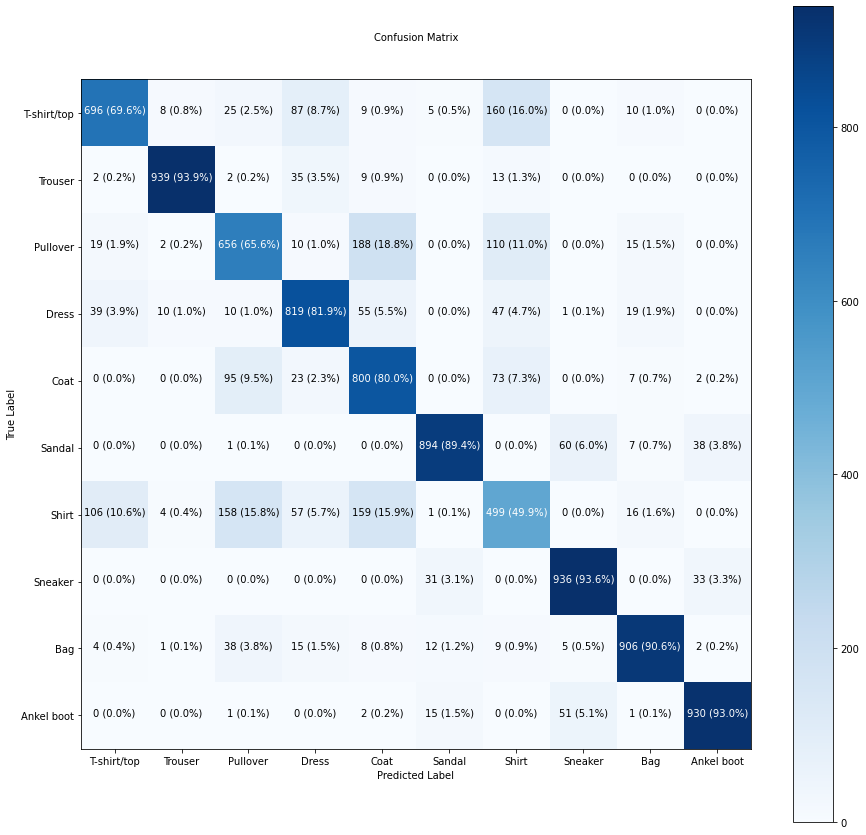

In [122]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15,15),
                      text_size=10)